In [9]:
import meep as mp
import numpy as np
import math
import cmath


sx = 1
sy = 1
sz = 8
r = 0.409393
h = 1.25
dpml = 0.5
eps_si = 3.54**2
eps_pdms = 1.4**2
b_m = 1.4
c_m = 3.54
res = 20
echo = 1000

cell_size = mp.Vector3(sx,sy,sz)
geometry = [mp.Block(size = cell_size, material=mp.Medium(index=b_m)),
            mp.Cylinder(radius=r,height=h, material=mp.Medium(index = c_m))]
pml_layers = [mp.PML(thickness= 1, direction = mp.Z, side=mp.High),
              mp.Absorber(thickness=1,direction = mp.Z, side=mp.Low)]
fcen = 0.47647
df = 0.2

theta = math.radians(0)

# k with correct length (plane of incidence: XZ) 
k = mp.Vector3(math.sin(theta),0,math.cos(theta)).scale(fcen)

def pw_amp(k, x0):
    def _pw_amp(x):
        return cmath.exp(1j * 2 * math.pi * k.dot(x + x0))
    return _pw_amp


src_pos = -(sz/2 - dpml - 0.5)
src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                 component = mp.Ey,
                 center = mp.Vector3(0,0,src_pos),
                 size = mp.Vector3(sx,sy,0),
                 amp_func=pw_amp(k,mp.Vector3(0,0,src_pos))
               )]
sim = mp.Simulation(resolution=res,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=src,
                    geometry=geometry,
                    k_point=k
                   )
freg = mp.FluxRegion(center=mp.Vector3(0,0,-src_pos),
                     size = mp.Vector3(sx,sy,0)
                    )
nfreq = 500
trans = sim.add_flux(fcen, df, nfreq, freg)


In [10]:
sim.run(until = echo)
bend = mp.get_fluxes(trans)


-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 1.475/1000.0 = 0.1% done in 4.0s, 2710.1s to go
Meep progress: 3.9000000000000004/1000.0 = 0.4% done in 8.0s, 2052.4s to go
Meep progress: 6.4750000000000005/1000.0 = 0.6% done in 12.1s, 1850.6s to go
Meep progress: 9.125/1000.0 = 0.9% done in 16.1s, 1747.4s to go
Meep progress: 11.350000000000001/1000.0 = 1.1% done in 20.1s, 1752.5s to go
Meep progress: 14.0/1000.0 = 1.4% done in 24.1s, 1700.4s to go
Meep progress: 16.625/1000.0 = 1.7% done in 28.2s, 1665.2s to go
Meep progress: 19.275000000000002/1000.0 = 1.9% done in 32.2s, 1637.7s to go
Meep progress: 21.450000000000003/1000.0 = 2.1% done in 36.2s, 1653.6s to go
Meep progress: 23.950000000000003/1000.0 = 2.4% done in 40.3s, 1641.1s to go
Meep progress: 26.625/1000.0 = 2.7% done in 44.3s, 1619.6s to go
Meep progress: 29.275000000000002/1000.0 = 2.9% done in 48.3s, 1602.5s to go
Meep progress: 31.325000000000003/1000.0 = 3.1% done in 52.3s, 1618.8s to go

Meep progress: 293.5/1000.0 = 29.4% done in 466.2s, 1122.3s to go
Meep progress: 295.75/1000.0 = 29.6% done in 470.3s, 1119.8s to go
Meep progress: 298.425/1000.0 = 29.8% done in 474.3s, 1115.0s to go
Meep progress: 301.1/1000.0 = 30.1% done in 478.3s, 1110.2s to go
Meep progress: 303.675/1000.0 = 30.4% done in 482.3s, 1106.0s to go
Meep progress: 305.95/1000.0 = 30.6% done in 486.4s, 1103.3s to go
Meep progress: 308.625/1000.0 = 30.9% done in 490.4s, 1098.5s to go
Meep progress: 311.32500000000005/1000.0 = 31.1% done in 494.4s, 1093.7s to go
Meep progress: 314.02500000000003/1000.0 = 31.4% done in 498.4s, 1088.8s to go
Meep progress: 316.3/1000.0 = 31.6% done in 502.5s, 1086.1s to go
Meep progress: 318.85/1000.0 = 31.9% done in 506.5s, 1082.1s to go
Meep progress: 321.5/1000.0 = 32.1% done in 510.6s, 1077.5s to go
Meep progress: 324.125/1000.0 = 32.4% done in 514.6s, 1073.1s to go
Meep progress: 326.40000000000003/1000.0 = 32.6% done in 518.7s, 1070.4s to go
Meep progress: 329.1/1000.

Meep progress: 588.525/1000.0 = 58.9% done in 932.8s, 652.2s to go
Meep progress: 591.275/1000.0 = 59.1% done in 936.8s, 647.6s to go
Meep progress: 594.1/1000.0 = 59.4% done in 940.9s, 642.8s to go
Meep progress: 596.9250000000001/1000.0 = 59.7% done in 944.9s, 638.0s to go
Meep progress: 599.375/1000.0 = 59.9% done in 948.9s, 634.2s to go
Meep progress: 602.225/1000.0 = 60.2% done in 952.9s, 629.4s to go
Meep progress: 604.75/1000.0 = 60.5% done in 956.9s, 625.4s to go
Meep progress: 607.5/1000.0 = 60.8% done in 960.9s, 620.9s to go
Meep progress: 609.9/1000.0 = 61.0% done in 965.0s, 617.2s to go
Meep progress: 612.7/1000.0 = 61.3% done in 969.0s, 612.5s to go
Meep progress: 615.5500000000001/1000.0 = 61.6% done in 973.0s, 607.7s to go
Meep progress: 618.35/1000.0 = 61.8% done in 977.0s, 603.0s to go
Meep progress: 620.8000000000001/1000.0 = 62.1% done in 981.0s, 599.2s to go
Meep progress: 623.6500000000001/1000.0 = 62.4% done in 985.0s, 594.4s to go
Meep progress: 626.5/1000.0 = 62

Meep progress: 903.625/1000.0 = 90.4% done in 1398.8s, 149.2s to go
Meep progress: 906.475/1000.0 = 90.6% done in 1402.9s, 144.7s to go
Meep progress: 909.2/1000.0 = 90.9% done in 1406.9s, 140.5s to go
Meep progress: 911.6500000000001/1000.0 = 91.2% done in 1410.9s, 136.7s to go
Meep progress: 913.375/1000.0 = 91.3% done in 1414.9s, 134.2s to go
Meep progress: 915.8000000000001/1000.0 = 91.6% done in 1418.9s, 130.5s to go
Meep progress: 918.625/1000.0 = 91.9% done in 1423.0s, 126.1s to go
Meep progress: 921.3000000000001/1000.0 = 92.1% done in 1427.0s, 121.9s to go
Meep progress: 923.95/1000.0 = 92.4% done in 1431.0s, 117.8s to go
Meep progress: 926.7750000000001/1000.0 = 92.7% done in 1435.0s, 113.4s to go
Meep progress: 929.225/1000.0 = 92.9% done in 1439.1s, 109.6s to go
Meep progress: 931.2/1000.0 = 93.1% done in 1443.1s, 106.6s to go
Meep progress: 933.7/1000.0 = 93.4% done in 1447.1s, 102.8s to go
Meep progress: 936.5500000000001/1000.0 = 93.7% done in 1451.2s, 98.3s to go
Meep p

In [15]:
bend

[-0.05696124400778481,
 -0.05688827202582818,
 -0.05677890556398024,
 -0.05665376945774766,
 -0.05651067170711613,
 -0.05637114001175646,
 -0.05628552356974658,
 -0.05610433792820383,
 -0.05590451727899889,
 -0.055693452870881836,
 -0.05546910990625973,
 -0.05523040379744132,
 -0.0549769522406648,
 -0.054708849767684815,
 -0.05442661306027067,
 -0.0541312179997178,
 -0.05382420150597247,
 -0.05350782117501594,
 -0.05318526379036077,
 -0.05286087046648503,
 -0.05254025503866098,
 -0.05222988228667742,
 -0.0519347635545771,
 -0.05165077773368218,
 -0.051346056231257035,
 -0.050940470050372964,
 -0.05035728210936962,
 -0.04965862671877558,
 -0.04892190665600688,
 -0.04829090317544221,
 -0.0477450322274814,
 -0.04714026297304522,
 -0.046480903975857496,
 -0.04570849962267468,
 -0.044780357962712174,
 -0.04395985256712005,
 -0.04320926016968642,
 -0.042508101923720024,
 -0.041848116253143886,
 -0.04122607183431477,
 -0.04064118014377904,
 -0.04009399401972924,
 -0.03958593898183737,
 -0.039

In [ ]:
sim.init_sim()

eps_data = sim.get_epsilon()

from mayavi import mlab
s = mlab.contour3d(eps_data, colormap="YlGnBu")
mlab.show()

In [11]:
sim.reset_meep()

cell_size = mp.Vector3(sx,sy,sz)
geometry = [mp.Block(size = mp.Vector3(sx,sy,sz), material=mp.Medium(index=b_m))]
pml_layers = [mp.PML(thickness= 1, direction = mp.Z, side=mp.High),
              mp.Absorber(thickness=1,direction = mp.Z, side=mp.Low)]
src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                 component = mp.Ey,
                 center = mp.Vector3(0,0,src_pos),
                 size = mp.Vector3(sx,sy,0),
                 amp_func=pw_amp(k,mp.Vector3(0,0,src_pos))
               )]
sim = mp.Simulation(resolution=res,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=src,
                    geometry=geometry,
                    k_point=k
                   )
freg = mp.FluxRegion(center=mp.Vector3(0,0,-src_pos),
                     size = mp.Vector3(sx,sy,0)
                    )
nfreq = 500
trans = sim.add_flux(fcen, df, nfreq, freg)


In [12]:
sim.run(until = echo)
straight = mp.get_fluxes(trans)
flux_freqs = mp.get_flux_freqs(trans)

-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 2.025/1000.0 = 0.2% done in 4.0s, 1975.7s to go
Meep progress: 4.55/1000.0 = 0.5% done in 8.0s, 1759.0s to go
Meep progress: 6.5/1000.0 = 0.7% done in 12.1s, 1854.6s to go
Meep progress: 8.275/1000.0 = 0.8% done in 16.1s, 1933.8s to go
Meep progress: 10.450000000000001/1000.0 = 1.0% done in 20.2s, 1909.1s to go
Meep progress: 12.75/1000.0 = 1.3% done in 24.2s, 1871.0s to go
Meep progress: 14.9/1000.0 = 1.5% done in 28.2s, 1867.0s to go
Meep progress: 17.35/1000.0 = 1.7% done in 32.2s, 1826.1s to go
Meep progress: 19.975/1000.0 = 2.0% done in 36.2s, 1778.2s to go
Meep progress: 22.475/1000.0 = 2.2% done in 40.3s, 1751.3s to go
Meep progress: 24.200000000000003/1000.0 = 2.4% done in 44.3s, 1786.7s to go
Meep progress: 25.85/1000.0 = 2.6% done in 48.3s, 1821.1s to go
Meep progress: 28.400000000000002/1000.0 = 2.8% done in 52.4s, 1791.0s to go
Meep progress: 31.1/1000.0 = 3.1% done in 56.4s, 1755.7s to go
Meep

Meep progress: 310.82500000000005/1000.0 = 31.1% done in 474.4s, 1051.9s to go
Meep progress: 313.57500000000005/1000.0 = 31.4% done in 478.4s, 1047.3s to go
Meep progress: 315.90000000000003/1000.0 = 31.6% done in 482.5s, 1044.8s to go
Meep progress: 318.52500000000003/1000.0 = 31.9% done in 486.5s, 1040.8s to go
Meep progress: 321.07500000000005/1000.0 = 32.1% done in 490.5s, 1037.2s to go
Meep progress: 323.52500000000003/1000.0 = 32.4% done in 494.5s, 1034.1s to go
Meep progress: 326.02500000000003/1000.0 = 32.6% done in 498.6s, 1030.6s to go
Meep progress: 328.5/1000.0 = 32.9% done in 502.6s, 1027.3s to go
Meep progress: 331.0/1000.0 = 33.1% done in 506.6s, 1023.9s to go
Meep progress: 333.55/1000.0 = 33.4% done in 510.6s, 1020.2s to go
Meep progress: 336.05/1000.0 = 33.6% done in 514.6s, 1016.8s to go
Meep progress: 338.52500000000003/1000.0 = 33.9% done in 518.6s, 1013.4s to go
Meep progress: 341.07500000000005/1000.0 = 34.1% done in 522.7s, 1009.7s to go
Meep progress: 343.8/10

Meep progress: 612.5500000000001/1000.0 = 61.3% done in 940.7s, 595.0s to go
Meep progress: 615.0500000000001/1000.0 = 61.5% done in 944.7s, 591.3s to go
Meep progress: 617.725/1000.0 = 61.8% done in 948.8s, 587.1s to go
Meep progress: 620.4000000000001/1000.0 = 62.0% done in 952.8s, 583.0s to go
Meep progress: 623.0500000000001/1000.0 = 62.3% done in 956.8s, 578.9s to go
Meep progress: 625.6/1000.0 = 62.6% done in 960.8s, 575.0s to go
Meep progress: 628.1750000000001/1000.0 = 62.8% done in 964.8s, 571.1s to go
Meep progress: 630.85/1000.0 = 63.1% done in 968.8s, 566.9s to go
Meep progress: 633.5250000000001/1000.0 = 63.4% done in 972.8s, 562.8s to go
Meep progress: 636.125/1000.0 = 63.6% done in 976.8s, 558.8s to go
Meep progress: 638.625/1000.0 = 63.9% done in 980.9s, 555.0s to go
Meep progress: 641.4000000000001/1000.0 = 64.1% done in 984.9s, 550.6s to go
Meep progress: 644.2/1000.0 = 64.4% done in 988.9s, 546.2s to go
Meep progress: 647.0/1000.0 = 64.7% done in 992.9s, 541.7s to go

Meep progress: 924.5500000000001/1000.0 = 92.5% done in 1403.0s, 114.5s to go
Meep progress: 927.25/1000.0 = 92.7% done in 1407.0s, 110.4s to go
Meep progress: 929.8000000000001/1000.0 = 93.0% done in 1411.0s, 106.5s to go
Meep progress: 932.5250000000001/1000.0 = 93.3% done in 1415.1s, 102.4s to go
Meep progress: 935.25/1000.0 = 93.5% done in 1419.1s, 98.2s to go
Meep progress: 937.825/1000.0 = 93.8% done in 1423.1s, 94.3s to go
Meep progress: 940.4000000000001/1000.0 = 94.0% done in 1427.1s, 90.4s to go
Meep progress: 943.0/1000.0 = 94.3% done in 1431.1s, 86.5s to go
Meep progress: 945.7/1000.0 = 94.6% done in 1435.1s, 82.4s to go
Meep progress: 948.5/1000.0 = 94.8% done in 1439.1s, 78.1s to go
Meep progress: 951.0250000000001/1000.0 = 95.1% done in 1443.1s, 74.3s to go
Meep progress: 953.8000000000001/1000.0 = 95.4% done in 1447.2s, 70.1s to go
Meep progress: 956.5250000000001/1000.0 = 95.7% done in 1451.2s, 66.0s to go
Meep progress: 959.3000000000001/1000.0 = 95.9% done in 1455.2s

In [ ]:
sim.init_sim()

eps_data = sim.get_epsilon()

from mayavi import mlab
s = mlab.contour3d(eps_data, colormap="YlGnBu")
mlab.show()

In [8]:
straight

[2.450427197037822e-22,
 2.391281265145376e-22,
 2.318046575501601e-22,
 2.2300404354390758e-22,
 2.126599010711167e-22,
 2.0070815961282959e-22,
 1.870875051748676e-22,
 1.7173983862549116e-22,
 1.5461074773254894e-22,
 1.3564999129476459e-22,
 1.1481199349480168e-22,
 9.205634733640866e-23,
 6.734832430231631e-23,
 4.0659388756733345e-23,
 1.196771501858176e-23,
 -1.8741295834489836e-23,
 -5.147450251153508e-23,
 -8.623051363071559e-23,
 -1.2299918766095855e-22,
 -1.6176114199381489e-22,
 -2.024872777502126e-22,
 -2.4513832047129566e-22,
 -2.896643813685439e-22,
 -3.3600454239175054e-22,
 -3.840864677121962e-22,
 -4.338260460633854e-22,
 -4.851270662089055e-22,
 -5.378809301867436e-22,
 -5.919664067099924e-22,
 -6.472494288461106e-22,
 -7.035829390497118e-22,
 -7.60806785149485e-22,
 -8.187476700605349e-22,
 -8.772191592064392e-22,
 -9.360217477261925e-22,
 -9.949429911516348e-22,
 -1.0537577021644422e-21,
 -1.1122282149204207e-21,
 -1.1701047217823294e-21,
 -1.2271256815227583e-21,


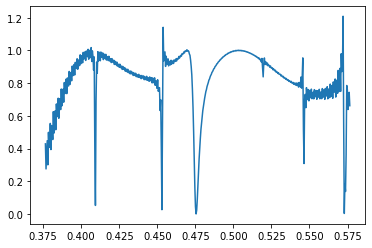

In [13]:
import matplotlib.pyplot as plt
Ts = []
wl = []
for i in range(nfreq):
    wl = np.append(wl, flux_freqs[i])
    Ts = np.append(Ts, bend[i]/straight[i])
plt.figure()
#plt.ylim(0,1)
plt.plot(wl,Ts)